In [20]:
import os
import cv2
import time
import argparse
import multiprocessing
import numpy as np
import tensorflow as tf
%matplotlib inline
from matplotlib import pyplot as plt

In [21]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [22]:
os.chdir("/Users/kunal/Documents/AAPersonalAIPROJECT/Cardetection/")

In [23]:
CWD_PATH = os.getcwd()

# Path to frozen detection graph. This is the actual model that is used for the object detection.
MODEL_NAME = 'ssd_mobilenet_v1_coco_11_06_2017'
PATH_TO_CKPT = os.path.join(CWD_PATH, MODEL_NAME, 'frozen_inference_graph.pb')

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join(CWD_PATH, 'mscoco_label_map.pbtxt')

In [24]:
os.path.exists(PATH_TO_CKPT)

True

In [25]:
os.path.exists(PATH_TO_LABELS)

True

In [27]:
print(tf.__version__)

2.3.1


In [28]:
import tensorflow.compat.v1

In [30]:
NUM_CLASSES = 90

# Loading label map
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES,
                                                            use_display_name=True)
category_index = label_map_util.create_category_index(categories)

AttributeError: module 'tensorflow' has no attribute 'gfile'

In [9]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [10]:
count=0
for i in os.listdir("test_images"):
    count+=1
    print(i)
array = []
for i in range(count):
    thing = "test_images/frame" + str(i) + ".png"
    array.append(thing)

frame0.png
frame1.png
frame10.png
frame11.png
frame12.png
frame13.png
frame14.png
frame15.png
frame16.png
frame2.png
frame3.png
frame4.png
frame5.png
frame6.png
frame7.png
frame8.png
frame9.png


In [11]:
print(array)

['test_images/frame0.png', 'test_images/frame1.png', 'test_images/frame2.png', 'test_images/frame3.png', 'test_images/frame4.png', 'test_images/frame5.png', 'test_images/frame6.png', 'test_images/frame7.png', 'test_images/frame8.png', 'test_images/frame9.png', 'test_images/frame10.png', 'test_images/frame11.png', 'test_images/frame12.png', 'test_images/frame13.png', 'test_images/frame14.png', 'test_images/frame15.png', 'test_images/frame16.png']


In [12]:
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS =array

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [13]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [14]:
from PIL import Image
for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    image_np = load_image_into_numpy_array(image)
    plt.imshow(image_np)
    print(image.size, image_np.shape)

(2160, 3840) (3840, 2160, 3)
(2160, 3840) (3840, 2160, 3)
(2160, 3840) (3840, 2160, 3)
(2160, 3840) (3840, 2160, 3)
(2160, 3840) (3840, 2160, 3)
(2160, 3840) (3840, 2160, 3)
(2160, 3840) (3840, 2160, 3)
(2160, 3840) (3840, 2160, 3)
(2160, 3840) (3840, 2160, 3)
(3840, 2160) (2160, 3840, 3)
(3840, 2160) (2160, 3840, 3)
(3840, 2160) (2160, 3840, 3)
(3840, 2160) (2160, 3840, 3)
(3840, 2160) (2160, 3840, 3)
(3840, 2160) (2160, 3840, 3)
(3840, 2160) (2160, 3840, 3)
(2160, 3840) (3840, 2160, 3)


In [54]:
#Load a frozen TF model 
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

(3840, 2160, 3)
(3840, 2160, 3)
(3840, 2160, 3)
(3840, 2160, 3)
(3840, 2160, 3)
(3840, 2160, 3)
(3840, 2160, 3)
(3840, 2160, 3)
(3840, 2160, 3)
(2160, 3840, 3)
(2160, 3840, 3)
(2160, 3840, 3)
(2160, 3840, 3)
(2160, 3840, 3)
(2160, 3840, 3)
(2160, 3840, 3)
(3840, 2160, 3)


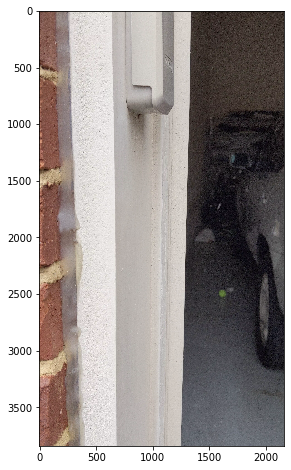

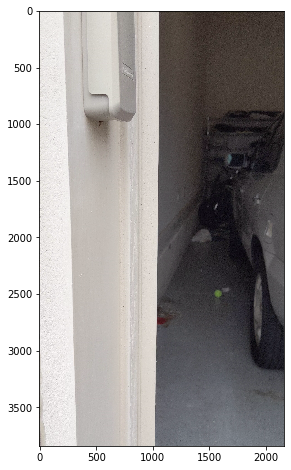

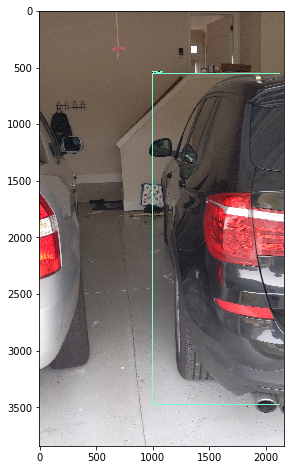

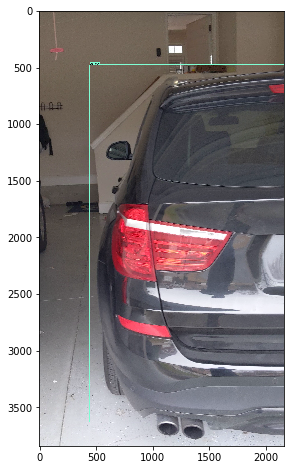

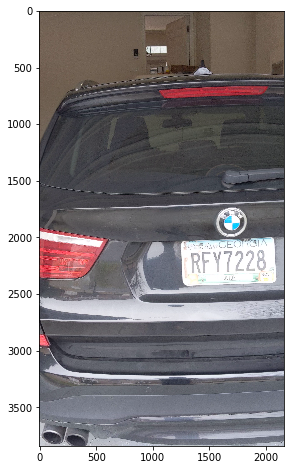

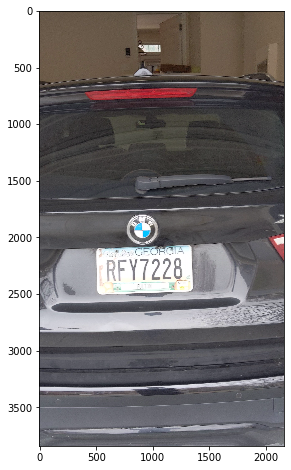

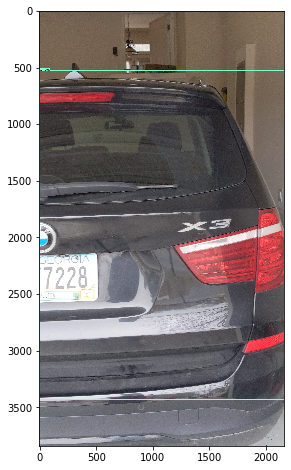

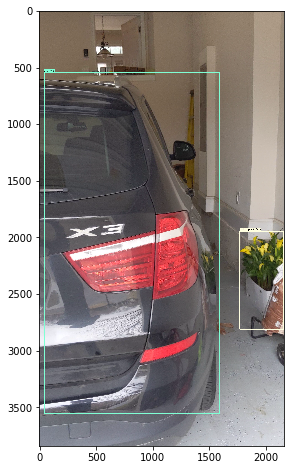

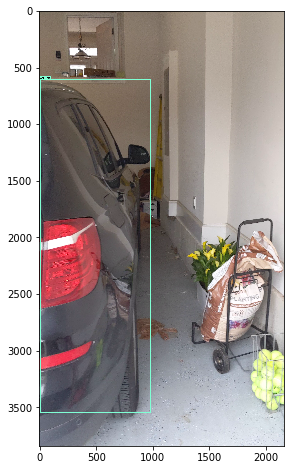

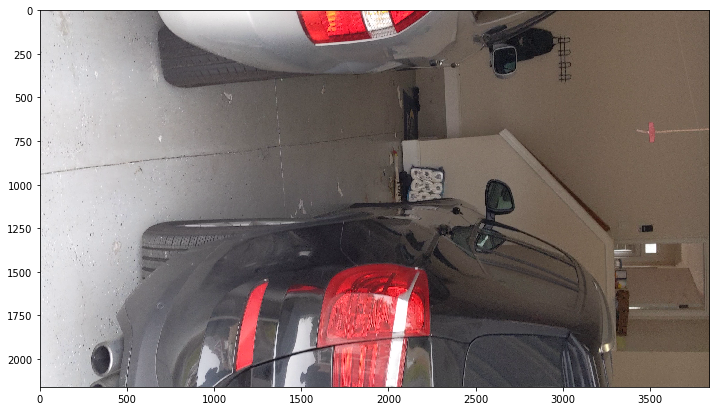

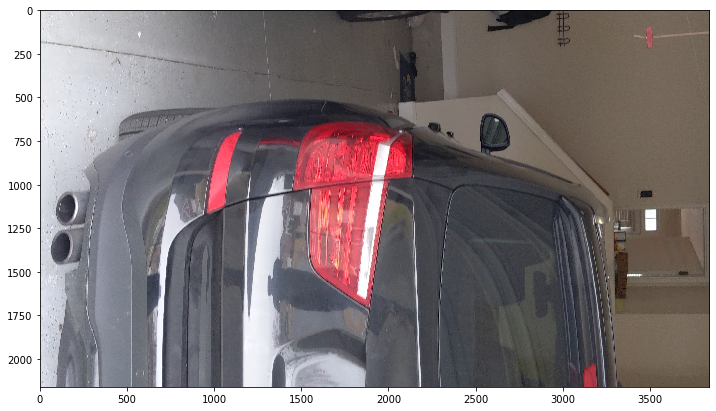

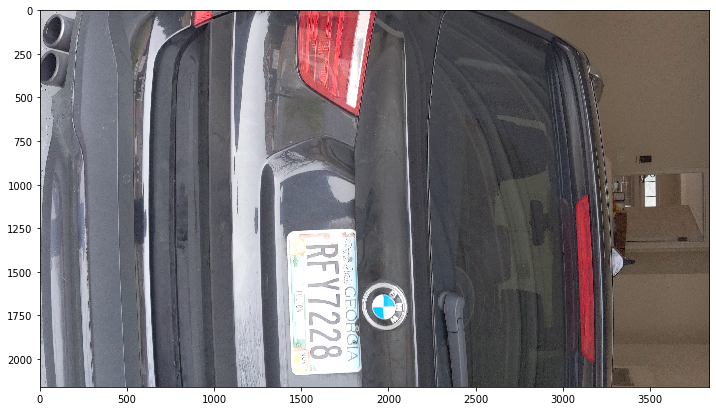

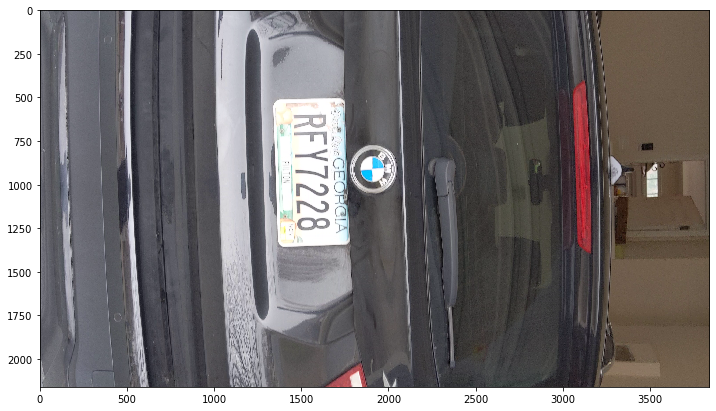

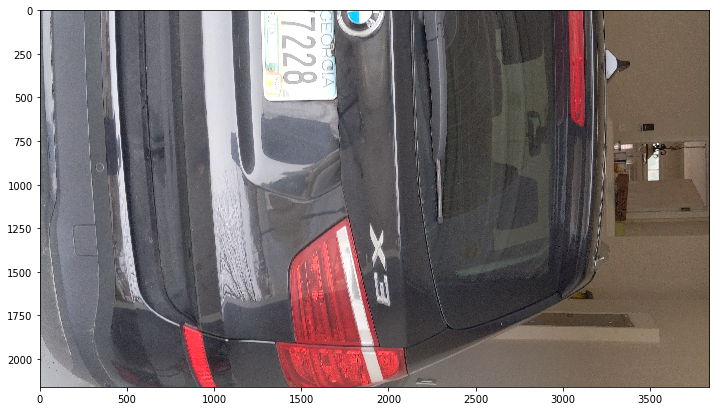

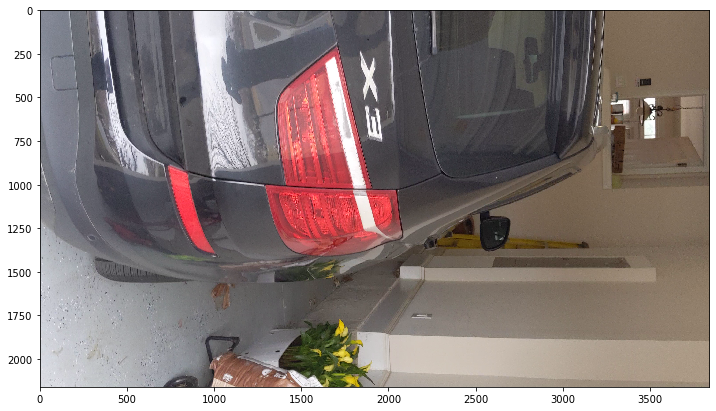

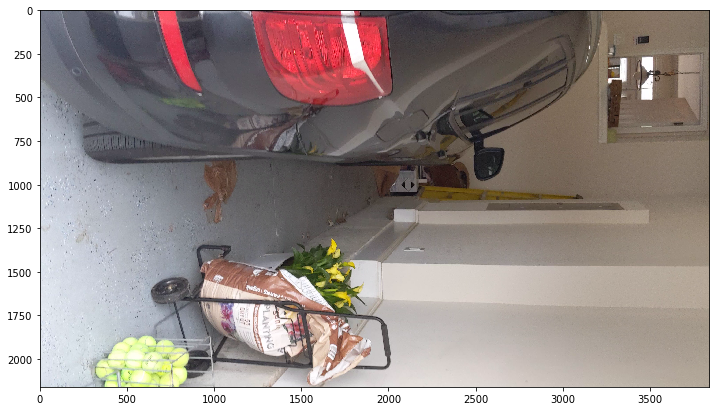

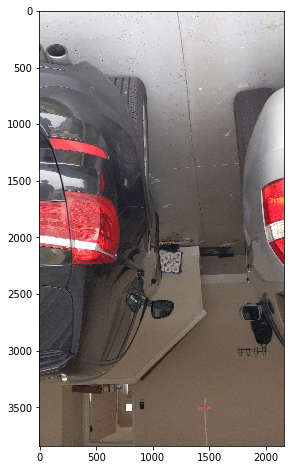

In [55]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_process = detect_objects(image_np, sess, detection_graph)
            print(image_process.shape)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_process)

In [ ]:
#after testing, it only detects the car and from far distance - no lisense plate

# Test 2


In [31]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if tf.__version__ < '1.4.0':
    raise ImportError('Please upgrade your tensorflow installation to v1.4.* or later!')

In [32]:
# This is needed to display the images.
%matplotlib inline

In [33]:
from utils import label_map_util

from utils import visualization_utils as vis_util

ModuleNotFoundError: No module named 'utils'

In [ ]:
# What model to download.
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = '/home/priya/Documents/mask_rcnn/exported_graphs_rcnn_inception' + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'toy_label_map.pbtxt')

NUM_CLASSES = 1

In [ ]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [ ]:

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [37]:
import pynche 

ModuleNotFoundError: No module named 'pynche'

In [42]:
import time
import os

In [43]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager

In [51]:
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Current google-chrome version is 88.0.4324
[WDM] - Get LATEST driver version for 88.0.4324
[WDM] - Driver [C:\Users\kunal\.wdm\drivers\chromedriver\win32\88.0.4324.96\chromedriver.exe] found in cache


In [52]:
r = [[30.166667699813843, (79, 79, 84), '#4f4f54'],
 [18.626984558068216, (0, 0, 0), '#000000'],
 [17.28571355342865, (112, 112, 119), '#707077'],
 [16.650792956352234, (62, 61, 65), '#3e3d41'],
 [5.563491955399513, (233, 233, 239), '#e9e9ef'],
 [5.468253791332245, (199, 200, 208), '#c7c8d0'],
 [3.452381119132042, (156, 157, 165), '#9c9da5'],
 [1.746031828224659, (105, 109, 127), '#696d7f'],
 [0.36507935728877783, (234, 112, 123), '#ea707b'],
 [0.3412698395550251, (187, 99, 101), '#bb6365'],
 [0.33333334140479565, (211, 120, 119), '#d37877']]

In [54]:
for i in r:
    link = "https://chir.ag/projects/name-that-color/" + i[2]
    driver.get(link)
    inputTXT = driver.find_element_by_xpath("/html/body/div/div[3]/div[2]/div[2]/div[3]/input")
    inputTXT.send_keys(Keys.CONTROL, 'a')
    inputTXT.send_keys(i[2])
    time.sleep(3)
    color = driver.find_element_by_xpath("/html/body/div/div[3]/div[2]/div[2]/h2")   
    print(color.text)
    time.sleep(3)

Abbeyapprox.
Blacksolid
Jumboapprox.
Ship Grayapprox.
Athens Grayapprox.
Ghostapprox.
Santas Grayapprox.
Storm Grayapprox.
Sungloapprox.
Contessaapprox.
New York Pinkapprox.


In [60]:
def clearEndofTxt(txt):
    if txt.endswith("approx."):
        return txt[:-7]
    elif txt.endswith("solid"):
        return txt[:-5]

In [61]:
clearEndofTxt("Blacksolid")

'Black'

In [48]:
link = "https://chir.ag/projects/name-that-color/" + '#000000'
driver.get(link)
color = driver.find_element_by_xpath("/html/body/div/div[3]/div[2]/div[2]/h2")   
print(color.text)

Abbeyapprox.


In [62]:
driver.close()

In [ ]:
def findColorName():
    